# Hebbian Learning Tutorial

### Before we get started

First, we import our packages.

In [1]:
# import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

Then we generate the data that we will use in our tutorial.

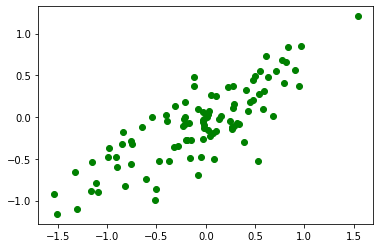

In [2]:
# generate the dataset
linalg = np.linalg
# We have 100 numbers in our dataset
num_samples = 100
num_variables = 2
cov = [[0.3, 0.2], [0.2, 0.2]]
# Generate data 
L = linalg.cholesky(cov)
uncorrelated = np.random.standard_normal((num_variables, num_samples))
mean = [0, 0]
correlated = np.dot(L, uncorrelated) + np.array(mean).reshape(2, 1)
plt.scatter(correlated[0, :], correlated[1, :], c='green')
plt.show()

In [3]:
# reshape the dataset into (100,2) 
dataset = correlated.reshape((100,2))

# Supervised Learning/Unsupervised Learning 
McCulloch-Pitts neuron, single layer perceptron, and multilayer perceptrons are examples of supervised learning in which we know the correct answer of the data points. However, now we switched to unsupervised learning. There are several unsupervised learning algorithms like KNN, Hebbian learning. In this tutorial, we are going to help you walk through what Hebbian learning is. If you have some knowledge of linear Algebra, the Hebbian learning may look familiar to you. What Hebbian learning does is to find the principal component of the dataset. 

# Intuition Behind Hebbian Learning
Hebbian learning was inspired by Long-term potentiation (LTP) and long-term depression (LTD). If you want to know more about LTP and LTD, please check these two videos: 

LTD: https://www.youtube.com/watch?v=B7ig6sIwIC8

LTP: https://www.youtube.com/watch?v=-mHgPfXHzJE

We infer from the LTP and LTD is the dw (the weight change per epoch) depends on our input data and the output that we calculated. 

# How to do Hebbian Learning? 

Consider the neuron below: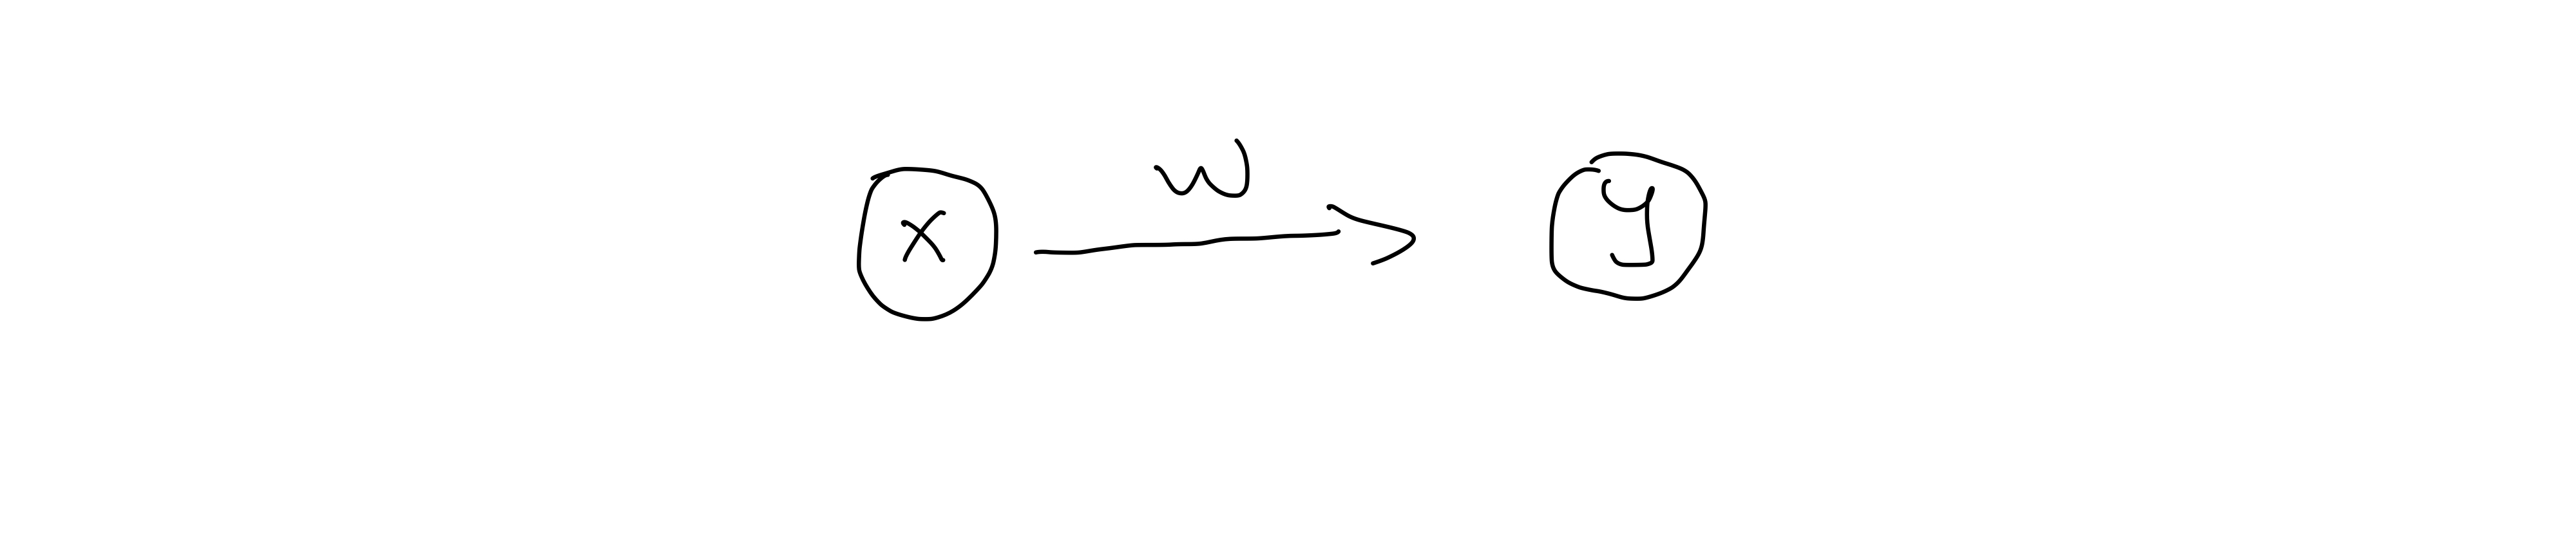


Notice that here the y is not our label, y is the output that we calculated by the equation below: 

$$y = wx$$

In Hebbian Learning, we continue to reenforce the connection between the x and y, by learning the $dw$

\begin{align*}
\frac{dw}{dt} &= x y\\
 &= x (w^T x)
\end{align*}
Imagine that we have a very big $x$, then our $\frac{dw}{dt}$ will also be a big number and force the neuron to learn. We can understand $\frac{dw}{dt}$ as the $dw$ per epoch. 



After a lot of epochs, the weight will converge to a vector with a fixed angle. We can treat $w$ as a constant and factor out $w$. So we have:  

$$\frac{dw}{dt} = w \left\langle xx^T\right\rangle$$ 

The component $\left\langle xx^T\right\rangle$ is what we call a correlation matrix. 





And when we are approaching the final weight, we are approaching the principal component (PCA) of the dataset. The short version of the principal component of a dataset is the best fit line of the dataset. And the final weight that we learnt in the Hebbian learning is the vector form of that best fit line. 

Here is a handout by Bruno A. Olshausen at UC Berkeley, and it have a detailed discussion regarding PCA and other knowledge about Hebbian learning: https://redwood.berkeley.edu/wp-content/uploads/2018/08/handout-hebb-PCA.pdf

### Hebbian Learning Codes! 

Now we use python to simulate the Hebbian learning in python! 

In [4]:
def hebbian(eta, w, x):
  # calculate our first prediction
  # We use the equation y = wx
  y = np.dot(w.T,x)
  # use Hebbian correlation learning rule to update weights
  # We use the equation: dw = xy 
  dw = eta * np.dot(x, y.T)
  # Update weights
  w = w + dw 
  return w

Let's try to use our Hebbian learning neuron to learn the first principal component of the dataset. 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


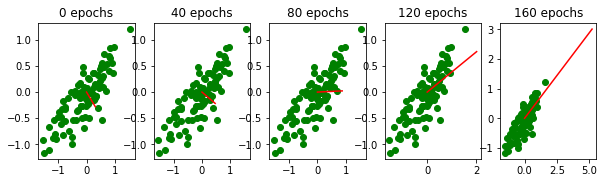

In [5]:
# Define the total epoch and the learning rate
numEpochs =  200
eta = 0.05/len(correlated.T)

# Initialize our weights
w = np.random.randn(2,1)

# Initialize our figure
fig, ax = plt.subplots(1, 5, figsize=(10, 2.5))
plotNum = 0

# loop through each epoch
for epoch in range(numEpochs):
  # Update weights
    w = hebbian(eta, w, correlated) 
  # Print the plot for every 40 epoches
    if epoch% 40==0:
      plotNum += 1
      ax[plotNum-1].scatter(correlated[0,:], correlated[1,:],c='green') 
      ax[plotNum-1].plot([0, w[0]],[0, w[1]], c='r') 
      ax[plotNum-1].set_title(str(epoch)+ ' epochs')


What a long weight!

## Oja's Rule

Did you find something weird happened? The weight is so long! The norm of the weight is larger than our expected value, and all the useful information that we need to know is the angle of the $w$. As a result, we have Oja's rule that we can keep the norm of the weight function as a constant. 

$$\frac{dw}{dt} = yx+y^2w$$



We can keep all the other equations and codes and only change the function of the $dw$.

In [6]:
def oja(eta, w, x):
  # calculate our first prediction
  y = np.dot(w.T,x)
  # use Oja's rule to update weights
  dw = eta * (np.matmul(x,y.T) - w*np.sum(y**2))
  # Update weights
  w = w + dw 
  return w

Now we use our modified Hebbian learning neuron to learn our principal component!

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


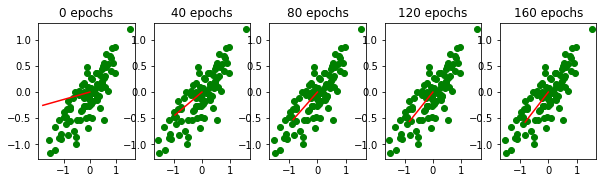

In [7]:
# Define the total epoch and the learning rate
numEpochs = 200
eta = 0.05/len(correlated.T)

# Initialize our weights
w = np.random.randn(2,1)

# Initialize our figure
fig, ax = plt.subplots(1, 5, figsize=(10, 2.5))
plotNum = 0

# loop through each epoch
for epoch in range(numEpochs):
  # Update weights
    w = oja(eta,w,correlated) 
  # Print the plot for every 40 epoches
    if epoch% 40==0:
      plotNum += 1
      ax[plotNum-1].scatter(correlated[0,:], correlated[1,:],c='green') 
      ax[plotNum-1].plot([0, w[0]],[0, w[1]], c='r') 
      ax[plotNum-1].set_title(str(epoch)+ ' epochs')

You can see that the norm of the weight does not change!

## Sanger's Rule

In the Hebbian Learning, we can only learn one principal component for each time. it's not so efficient, we want to let the machine to learn more! As a result, we introduce the Sanger's rule. 

In the Sanger's rule, suppose we have three neurons, which means we will find three principal component of the dataset. We first learn the first principal component, and then subtract it from the dataset to calculate the second pincipal component. Then we subtract the first and the second principal component from the dataset, to calcualte the thrid principal component. 

In [8]:
# get a copy of our dataset
sangerdata = correlated.reshape(2,100)

### Sanger's Rule in Python

Here we define a function that packed several neurons, and for each neuron, we are doing the same thing as the Hebbian learning.

In [9]:
def sanger(y, w, dw, data,numNeurons):
  # Copy our dataset
  X = data

  # Loop numNeurons each time 
  for n in range(numNeurons):
    # We need to separate the responses
    response_ = y[n, np.newaxis] 

    # We need to separate the weighs
    weight_ = np.reshape(w[:, n], (2, 1)) # xx by xx?
  
    # subtract the last principal component from data
    X = X - np.dot(response_.T, weight_.T).T # xx by xx?

    # compute the nth dw
    dw[:,n] = np.dot(response_, X.T)
    return dw 


We then apply Sanger's rule to find the principal component that we learned from the dataset. 

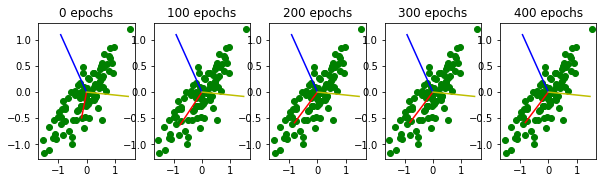

In [11]:
#Sanger
# Define our parameter 
numEpochs = 500
eta = 0.05/len(sangerdata.T)
numNeurons = 3

# Initialize our vector in Matrix 
w = np.random.randn(2,3)

# get ready for our graph 
fig, ax = plt.subplots(1, 5, figsize=(10, 2.5))
plotNum = 0
# loop through epochs
for i in range(numEpochs):
  # compute the linear response
  y = np.dot(w.T, sangerdata)
  # initialize dw
  dw = np.zeros(w.shape)
  # calculate the dw by the sanger's rule 
  dw = sanger(y, w, dw, sangerdata, numNeurons)
  # Update weight 
  w = w + eta*dw

  # Update the plot every 10 training iterations
  if i%100==0:
    plotNum += 1
    ax[plotNum-1].scatter(correlated[0,:], correlated[1,:], c='green') # scatterplot of data
    ax[plotNum-1].plot([0, w[0][0]],[0, w[1][0]], c='r') # weight vector
    ax[plotNum-1].plot([0, w[0][1]],[0, w[1][1]], c='b')
    ax[plotNum-1].plot([0, w[0][2]],[0, w[1][2]], c='y')
    ax[plotNum-1].set_title(str(i)+ ' epochs')

#Discussion 
Hebbian learning is a type of unsupervised learning that we can calculate the final output in math, which is the principal component. 

As a result, Hebbian learning is a very expensive method compared to directly calculating the principal components. 